---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [38]:
# import matplotlib.pyplot as plt
# %matplotlib notebook

<IPython.core.display.Javascript object>


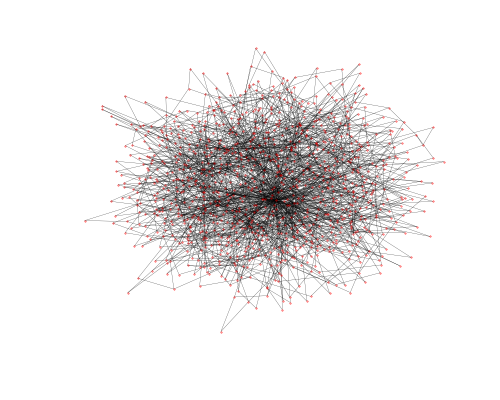

0.03167539146454044
4.099161161161161


In [31]:
# plt.figure(figsize=(5, 4))
# G = P1_Graphs[0]
# node_color = [G.degree(v) for v in G]
# nx.draw_networkx(G, node_size=0.1 ,with_labels=False, width=0.15)
# plt.axis('off')
# plt.tight_layout()
# print(nx.average_clustering(G))
# print(nx.average_shortest_path_length(G))

<IPython.core.display.Javascript object>


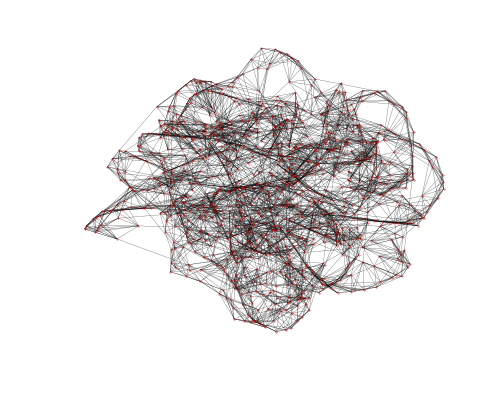

0.5642419635919628
5.089871871871872


In [32]:
# plt.figure(figsize=(5, 4))
# G = P1_Graphs[1]
# node_color = [G.degree(v) for v in G]
# nx.draw_networkx(G, node_size=0.1 ,with_labels=False, width=0.15)
# plt.axis('off')
# plt.tight_layout()
# print(nx.average_clustering(G))
# print(nx.average_shortest_path_length(G))

<IPython.core.display.Javascript object>


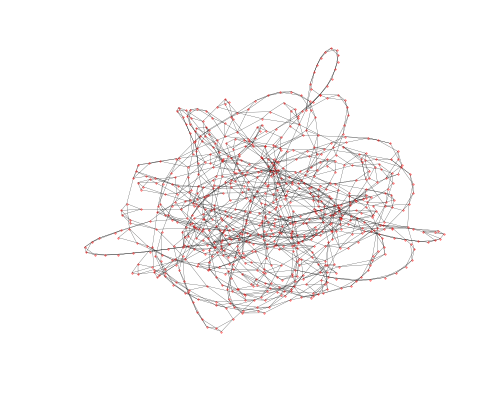

0.4018222222222227
9.378702269692925


In [33]:
# plt.figure(figsize=(5, 4))
# G = P1_Graphs[2]
# node_color = [G.degree(v) for v in G]
# nx.draw_networkx(G, node_size=0.1 ,with_labels=False, width=0.15)
# plt.axis('off')
# plt.tight_layout()
# print(nx.average_clustering(G))
# print(nx.average_shortest_path_length(G))

<IPython.core.display.Javascript object>


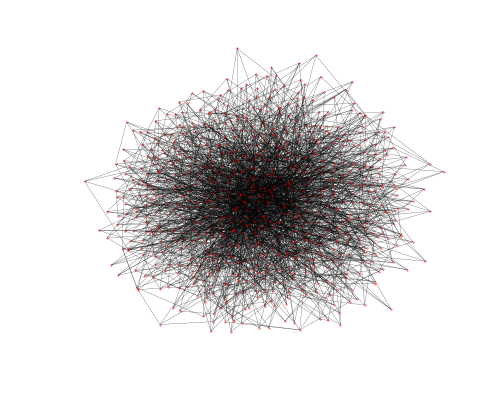

0.03780379975223251
3.1048046283934134


In [34]:
# plt.figure(figsize=(5, 4))
# G = P1_Graphs[3]
# node_color = [G.degree(v) for v in G]
# nx.draw_networkx(G, node_size=0.1 ,with_labels=False, width=0.15)
# plt.axis('off')
# plt.tight_layout()
# print(nx.average_clustering(G))
# print(nx.average_shortest_path_length(G))

<IPython.core.display.Javascript object>


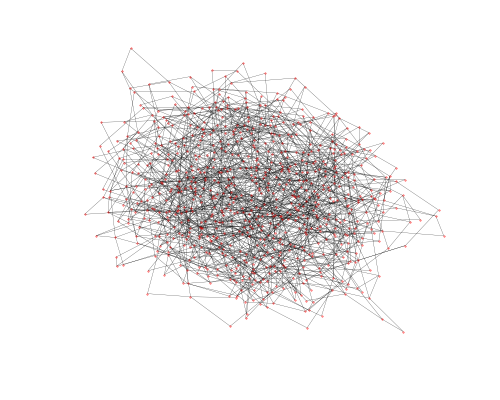

0.0033037037037037037
5.0785509568313305


In [35]:
# plt.figure(figsize=(5, 4))
# G = P1_Graphs[4]
# node_color = [G.degree(v) for v in G]
# nx.draw_networkx(G, node_size=0.1 ,with_labels=False, width=0.15)
# plt.axis('off')
# plt.tight_layout()
# print(nx.average_clustering(G))
# print(nx.average_shortest_path_length(G))

<IPython.core.display.Javascript object>


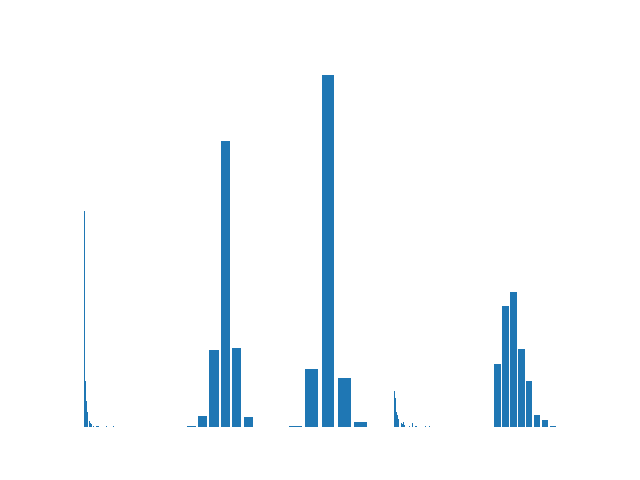

In [73]:
# fig, ax = plt.subplots(1, 5, sharex='col', sharey='row')
# histogram = []
# degree_values_list = []
# for G in P1_Graphs:
#     degrees = G.degree()
#     degree_values = sorted(set(degrees.values()))
#     histogram.append([list(degrees.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values])
#     degree_values_list.append(degree_values)

# yaxis = 0
# for degrees, histo_bar in zip(degree_values_list, histogram):
#     ax[yaxis].bar(degrees, histo_bar)
#     ax[yaxis].axis('off')
#     yaxis += 1

# plt.show()

In [126]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
def Power_Law(X, y):
    X_log = np.log(X).reshape(len(X), 1)
    y_log = np.log(y).reshape(len(y), 1)
    model = LinearRegression()
    model.fit(X_log, y_log)
    y_pred = model.predict(X_log)
    err = metrics.mean_squared_error(y_log, y_pred)
    #print(err)
    if err < 1:
        return True
    return False

In [127]:
def graph_identification():
    
    # Your Code Here
    result = []
    
    for G in P1_Graphs:
        degrees = G.degree()
        degree_values = sorted(set(degrees.values()))
        histogram = [list(degrees.values()).count(i) / float(nx.number_of_nodes(G)) for i in degree_values]
        #print(degree_values.shape)
        #print(histogram.shape)
        if Power_Law(degree_values, histogram):
            result.append('PA')
        elif nx.average_clustering(G) > 0.1:
            result.append('SW_L')
        else:
            result.append('SW_H')
    return result

In [128]:
graph_identification()

0.520944933119
4.87568614695
3.38638123744
0.478224799361
1.15502360586


['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [6]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [46]:
def salary_predictions():
    
    # Your Code Here
    df = pd.DataFrame(G.nodes(data=True))
    df['Department'] = df[1].apply(lambda x: x['Department'])
    df['ManagementSalary'] = df[1].apply(lambda x: x['ManagementSalary'])
    df.drop(1, axis=1, inplace=True)
    df.rename(columns = {0:'Node'}, inplace=True)
    df_test = df[df['ManagementSalary'].isnull()]
    df['Degree'] = nx.degree_centrality(G).values()
    df['Closeness'] = nx.closeness_centrality(G).values()
    df['Betweenness'] = nx.betweenness_centrality(G).values()
    df['PageRank'] = nx.pagerank(G).values()
    df['Hub Score'] = nx.hits(G)[0].values()
    df['Auth Score'] = nx.hits(G)[1].values()
    
    X_train = df[df['ManagementSalary'].notnull()][['Degree', 'Closeness', 'Betweenness', 'PageRank',
                                                'Hub Score', 'Auth Score', 'Department']]
    Y_train = df[df['ManagementSalary'].notnull()]['ManagementSalary']
    X_test = df[df['ManagementSalary'].isnull()][['Degree', 'Closeness', 'Betweenness', 'PageRank',
                                                'Hub Score', 'Auth Score', 'Department']]
    Y_test = df[df['ManagementSalary'].isnull()]['ManagementSalary']
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=[5, 5], alpha=5, solver='lbfgs')
    model.fit(X_train, Y_train)
    
    import sklearn.metrics as metrics
    predicted_prob = [x[1] for x in model.predict_proba(X_test)]
    result = pd.Series(predicted_prob, index=Y_test.index)
    
    return result

In [47]:
salary_predictions()

1       0.153352
2       0.504516
5       0.916708
8       0.112005
14      0.268560
18      0.214954
27      0.219842
30      0.304144
31      0.180186
34      0.083437
37      0.092638
40      0.164133
45      0.184224
54      0.193575
55      0.181638
60      0.131640
62      0.983952
65      0.395093
77      0.095022
79      0.158352
97      0.077558
101     0.091967
103     0.148928
108     0.140648
113     0.420369
122     0.059107
141     0.323556
142     0.891764
144     0.104715
145     0.515789
          ...   
913     0.063758
914     0.074757
915     0.029019
918     0.072626
923     0.033245
926     0.060641
931     0.063639
934     0.056840
939     0.032515
944     0.036577
945     0.035221
947     0.040532
950     0.231781
951     0.042846
953     0.055343
959     0.029993
962     0.029898
963     0.171304
968     0.036907
969     0.036450
974     0.042275
984     0.054644
987     0.061594
989     0.033832
991     0.050208
992     0.034318
994     0.039588
996     0.0322

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [35]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections[:10]

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [48]:
def new_connections_predictions():
    
    # Your Code Here
    index_order = future_connections[future_connections['Future Connection'].isnull()].index
    #print(index_order)
    df = future_connections.copy()
    df.sort_index(inplace=True)
    
    jacc_coef = [x[2] for x in list(nx.jaccard_coefficient(G))]
    #print("Jaccard Coef.. Done!")
    ra_index = [x[2] for x in list(nx.resource_allocation_index(G))]
    #print("RA Index.. Done!")
    adamic_adar = [x[2] for x in list(nx.adamic_adar_index(G))]
    #print("Adamic Adar.. Done!")
    pref_attach = [x[2] for x in list(nx.preferential_attachment(G))]
    #print("Pref. Attach.. Done!")
    community_common_neigh = [x[2] for x in list(nx.cn_soundarajan_hopcroft(G, community='Department'))]
    #print("Community Common Neighbor.. Done!")
    community_ra = [x[2] for x in list(nx.ra_index_soundarajan_hopcroft(G, community='Department'))]
    #print("Community RA Index.. Done!")
    
    df['jacc_coef'] = jacc_coef
    df['ra_index'] = ra_index
    df['adamic_adar'] = adamic_adar
    df['pref_attach'] = pref_attach
    df['community_common_neigh'] = community_common_neigh
    df['community_ra'] = community_ra
    
    X_train = df[df['Future Connection'].notnull()][['jacc_coef', 'ra_index', 'adamic_adar',
                                                            'pref_attach', 'community_common_neigh', 'community_ra']]
    y_train = df[df['Future Connection'].notnull()]['Future Connection']
    
    X_test = df[df['Future Connection'].isnull()][['jacc_coef', 'ra_index', 'adamic_adar',
                                                            'pref_attach', 'community_common_neigh', 'community_ra']]
    y_test = df[df['Future Connection'].isnull()]['Future Connection']
    
    #print("Train Test Split.. Done!")
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #print("Scaling.. Done!")
    
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(hidden_layer_sizes=[10, 5], alpha=5, solver='lbfgs')
    model.fit(X_train, y_train)
    
    #print("Model Fitted")
    
    import sklearn.metrics as metrics
    predicted_prob = [x[1] for x in model.predict_proba(X_test)]
    result = pd.Series(predicted_prob, index=y_test.index)
    result = result.reindex(index_order)
    
    #print("Results are here.")
    
    return result

In [49]:
new_connections_predictions()

Index([(107, 348), (542, 751),  (20, 426),  (50, 989), (942, 986), (324, 857),
        (13, 710),  (19, 271), (319, 878), (659, 707),
       ...
       (144, 824), (742, 985), (506, 684), (505, 916), (149, 214), (165, 923),
       (673, 755), (939, 940), (555, 905),  (75, 101)],
      dtype='object', length=122112)
Jaccard Coef.. Done!
RA Index.. Done!
Adamic Adar.. Done!
Pref. Attach.. Done!
Community Common Neighbor.. Done!
Community RA Index.. Done!
Train Test Split.. Done!
Scaling.. Done!
Model Fitted
Results are here.


(107, 348)    0.020268
(542, 751)    0.013261
(20, 426)     0.598617
(50, 989)     0.013284
(942, 986)    0.013308
(324, 857)    0.013280
(13, 710)     0.136204
(19, 271)     0.129342
(319, 878)    0.013291
(659, 707)    0.013263
(49, 843)     0.013298
(208, 893)    0.013269
(377, 469)    0.012323
(405, 999)    0.014894
(129, 740)    0.014519
(292, 618)    0.015135
(239, 689)    0.013293
(359, 373)    0.012716
(53, 523)     0.141052
(276, 984)    0.013297
(202, 997)    0.013302
(604, 619)    0.055883
(270, 911)    0.013292
(261, 481)    0.060994
(200, 450)    0.999995
(213, 634)    0.013254
(644, 735)    0.040016
(346, 553)    0.013198
(521, 738)    0.013088
(422, 953)    0.014655
                ...   
(672, 848)    0.013292
(28, 127)     0.943117
(202, 661)    0.013188
(54, 195)     0.999919
(295, 864)    0.013277
(814, 936)    0.013258
(839, 874)    0.013308
(139, 843)    0.013279
(461, 544)    0.013011
(68, 487)     0.012997
(622, 932)    0.013272
(504, 936)    0.014339
(479, 528) 